# Dataset

In [72]:
from random import randint, seed
seed(23)
dataset=[[randint(0,199),randint(0,199)] for i in range (4)]
titikasal=[randint(0,199),randint(0,199)]

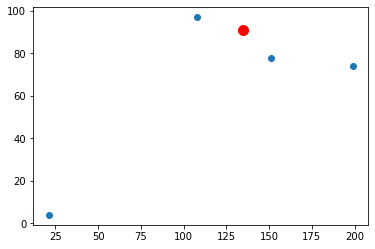

In [73]:
import matplotlib.pyplot as plt
plt.scatter([i[0] for i in dataset],[i[1] for i in dataset])
plt.scatter(titikasal[0],titikasal[1],c='red',s=100)

# Proses

In [74]:
def jarak(A,B):
    h=((A[0]-B[0])**2+(A[1]-B[1])**2)**(1/2)
    return h

def crosover1(n,data1,data2):
    data1temp=list(data1[:n])
    data2temp=list(data2[:n])
    for i in range(len(data1)):
        if data2[(i+n)%len(data1)] not in data1[:n]:
            data1temp.append(data2[(i+n)%len(data1)])
        if data1[(i+n)%len(data1)] not in data2[:n]:
            data2temp.append(data1[(i+n)%len(data1)])
    return list([data1temp, data2temp])

def GA(dataset,asal):
    from random import shuffle, randint
    
    # Populasi(dataset,asal)
    banyak=10
    populasi1=list([])
    lokasi2=list(dataset)
    for i in range(banyak):
        asal2=list([asal])
        shuffle(lokasi2)
        asal2.extend(lokasi2)
        populasi1.append(asal2)
    ## return populasi1
    
    beda=True
    while beda:
        # Menghitung fitnes (populasi1)
        populasiterpilih=list([])
        jarak1=list([])
        for i in populasi1:
            jarak2=0
            for j in range (len(i)):
                jarak3=jarak(i[j],i[(j+1)%len(i)])
                jarak2+=jarak3
            jarak1.append(jarak2)
        ## return jarak1
        
        # Seleksi(peluang,datajarak,populasi):
        jarak2=list(jarak1)
        jarak2.sort()
        peluang=0.4
        jmin1=[jarak2[i] for i in range(int(peluang*len(jarak1)))]
        n=0
        for i in range(len(jarak1)):
            if jarak1[i] in jmin1:
                populasiterpilih.append(populasi1[i])
                n+=1
            if n==peluang*10:
                break
        
        # Crosover(data,peluang):
        data1=list(populasi1)
        peluang=0.4
        n=randint(0,len(data1[0]))
        for i in range (0,len(data1),2):
            h=crosover1(n,data1[i],data1[(i+1)%len(data1)])
            data1[i],data1[(i+1)%len(data1)]=h[0],h[1]
        ## jarak dari crosover (populasi)
        jarak1=list([])
        for i in data1:
            jarak2=0
            for j in range (len(i)):
                jarak3=jarak(i[j],i[(j+1)%len(i)])
                jarak2+=jarak3
            jarak1.append(jarak2)
        ## seleksi dari crosover (peluang,datajarak,populasi)
        jarak2=list(jarak1)
        jarak2.sort()
        jmin1=[jarak2[i] for i in range(int(peluang*len(jarak1)))]
        n=0
        for i in range(len(jarak1)):
            if jarak1[i] in jmin1:
                populasiterpilih.append(data1[i])
                n+=1
            if n==peluang*10:
                break
        
        # Mutasi(data,peluang):
        data1=list(populasi1)
        peluang=0.2
        n=[randint(1,len(data1[0])-1),randint(1,len(data1[0])-1)]
        for i in range (len(data1)):
            data1[i][n[0]],data1[i][n[1]]=data1[i][n[1]],data1[i][n[0]]
        ## jarak dari mutasi (populasi)
        jarak1=list([])
        for i in data1:
            jarak2=0
            for j in range (len(i)):
                jarak3=jarak(i[j],i[(j+1)%len(i)])
                jarak2+=jarak3
            jarak1.append(jarak2)
        ## seleksi dari mutasi (peluang,datajarak,populasi)
        jarak2=list(jarak1)
        jarak2.sort()
        jmin1=[jarak2[i] for i in range(int(peluang*len(jarak1)))]
        n=0
        for i in range(len(jarak1)):
            if jarak1[i] in jmin1:
                populasiterpilih.append(data1[i])
                n+=1
            if n==peluang*10:
                break
        
        ## jarak dari populasi terpilih (populasi)
        jarak1=list([])
        for i in populasiterpilih:
            jarak2=0
            for j in range (len(i)):
                jarak3=jarak(i[j],i[(j+1)%len(i)])
                jarak2+=jarak3
            jarak1.append(jarak2)
        jarak1.sort()
        if jarak1[0]==jarak1[9]:
            beda=False
        populasi1=list(populasiterpilih)
    return populasiterpilih[0]

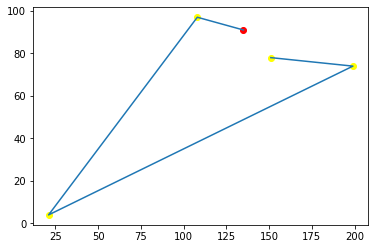

In [78]:
populasi=GA(dataset,titikasal)

import matplotlib.pyplot as plt
plt.plot([i[0] for i in populasi],[i[1] for i in populasi])
plt.scatter(titikasal[0],titikasal[1],c='red')
plt.scatter([i[0] for i in dataset],[i[1] for i in dataset],c='yellow')